In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'D:\PDPU Assignments\Data Mining\DM Assignment 5\heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [6]:
df.isnull().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

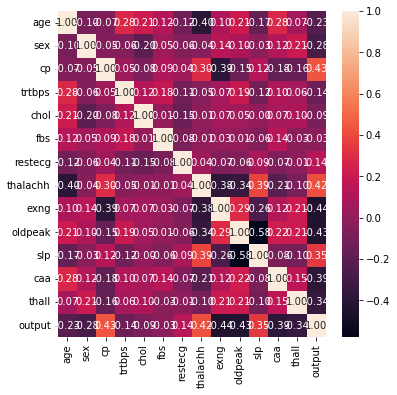

In [7]:
#negligible correlation between numerical variables
plt.figure(figsize= (6, 6))
sns.heatmap(df.corr(), annot = True, fmt= '.2f');

In [34]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [43]:
categorical_cols=['sex','cp','fbs','restecg','exng','slp','caa','thall','output']

normalizing the numerical features

In [44]:
numerical_cols=np.setdiff1d(df.columns,categorical_cols)
numerical_cols

array(['age', 'chol', 'oldpeak', 'thalachh', 'trtbps'], dtype=object)

In [46]:
df[numerical_cols]=(df[numerical_cols]-df[numerical_cols].mean())/df[numerical_cols].std()

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x=df.drop('output',axis=1)
y=df['output']

In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [52]:
xtrain.shape

(227, 13)

In [53]:
xtest.shape

(76, 13)

In [56]:
from sklearn.svm import SVC

In [57]:
from feature_engine.selection import DropConstantFeatures,DropDuplicateFeatures,SmartCorrelatedSelection
from sklearn.pipeline import Pipeline
pipe=Pipeline([('constant',DropConstantFeatures(tol=0.95)),('duplicate',DropDuplicateFeatures()),('smartcorrelation',SmartCorrelatedSelection(threshold=0.95,estimator=SVC))])

In [58]:
xtrainnew=pipe.fit_transform(xtrain)

In [59]:
xtrainnew.shape#no feature was dropped

(227, 13)

Performing grid search

In [63]:
svm=SVC(random_state=0)

In [61]:
from sklearn.model_selection import GridSearchCV

In [75]:
#using rbf kernel
parameters=[{'gamma':[0.01,0.1,0.5,0.8,1,10],'C':[int(i) for i in np.linspace(start=1,stop=100,num=11)]}]
grid=GridSearchCV(svm,param_grid=parameters,cv=4,verbose=1)

In [76]:
grid.fit(xtrain,ytrain)

Fitting 4 folds for each of 66 candidates, totalling 264 fits


GridSearchCV(cv=4, estimator=SVC(random_state=0),
             param_grid=[{'C': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                          'gamma': [0.01, 0.1, 0.5, 0.8, 1, 10]}],
             verbose=1)

In [77]:
grid.best_estimator_

SVC(C=10, gamma=0.01, random_state=0)

In [79]:
svmm=SVC(gamma=0.01,C=10,random_state=0)

In [80]:
svmm.fit(xtrain,ytrain)

SVC(C=10, gamma=0.01, random_state=0)

In [81]:
pred=svmm.predict(xtest)

In [82]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [83]:
accuracy_score(ytest,pred)

0.881578947368421

In [84]:
confusion_matrix(ytest,pred)

array([[30,  8],
       [ 1, 37]], dtype=int64)

In [85]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87        38
           1       0.82      0.97      0.89        38

    accuracy                           0.88        76
   macro avg       0.89      0.88      0.88        76
weighted avg       0.89      0.88      0.88        76

